**Importing the libraries**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
"""1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps"""

**Importing the dataset**

In [15]:
df = pd.read_csv("trainKNN.txt",sep = "," ,header = None, names = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","types_of_glass"] )
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,types_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [16]:
df.shape

(196, 11)

**Data** **Preprocessing**

In [12]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,types_of_glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517413,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [ ]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,types_of_glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,158.000000,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,46.209243,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,68.000000,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,145.250000,1.517413,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,168.500000,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,183.750000,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,214.000000,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


                      Id        RI  ...        Fe  types_of_glass
Id              1.000000 -0.073356  ... -0.139309        0.876191
RI             -0.073356  1.000000  ...  0.104980       -0.166670
Na              0.354835 -0.158559  ... -0.250335        0.484154
Mg             -0.634686 -0.153610  ...  0.066167       -0.714713
Al              0.529855 -0.446641  ... -0.067659        0.640944
Si              0.012142 -0.530520  ... -0.058347        0.092812
K               0.039460 -0.296570  ... -0.011720        0.029423
Ca              0.080707  0.821277  ...  0.120076       -0.019545
Ba              0.443468  0.009425  ... -0.030133        0.566769
Fe             -0.139309  0.104980  ...  1.000000       -0.227560
types_of_glass  0.876191 -0.166670  ... -0.227560        1.000000

[11 rows x 11 columns]


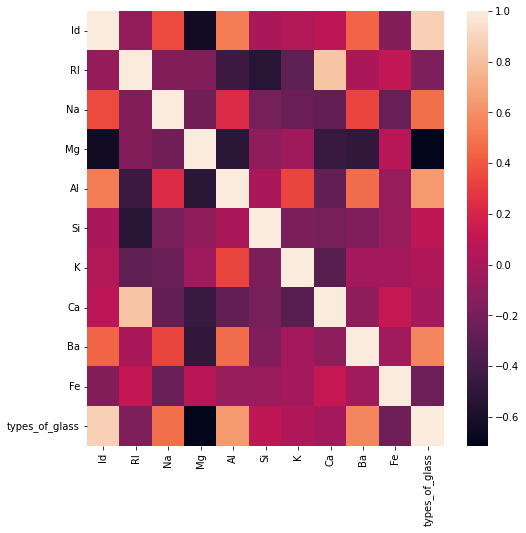

In [24]:
correlation = df.corr()
print(correlation)
x,y = plt.subplots(figsize = (8,8))
sns.heatmap(correlation);


In [32]:
df2 = df.drop(columns =["Id"])

Based on the correlation matrix RI and Ca are highly correlated so we will take any one from this RI and Ca.

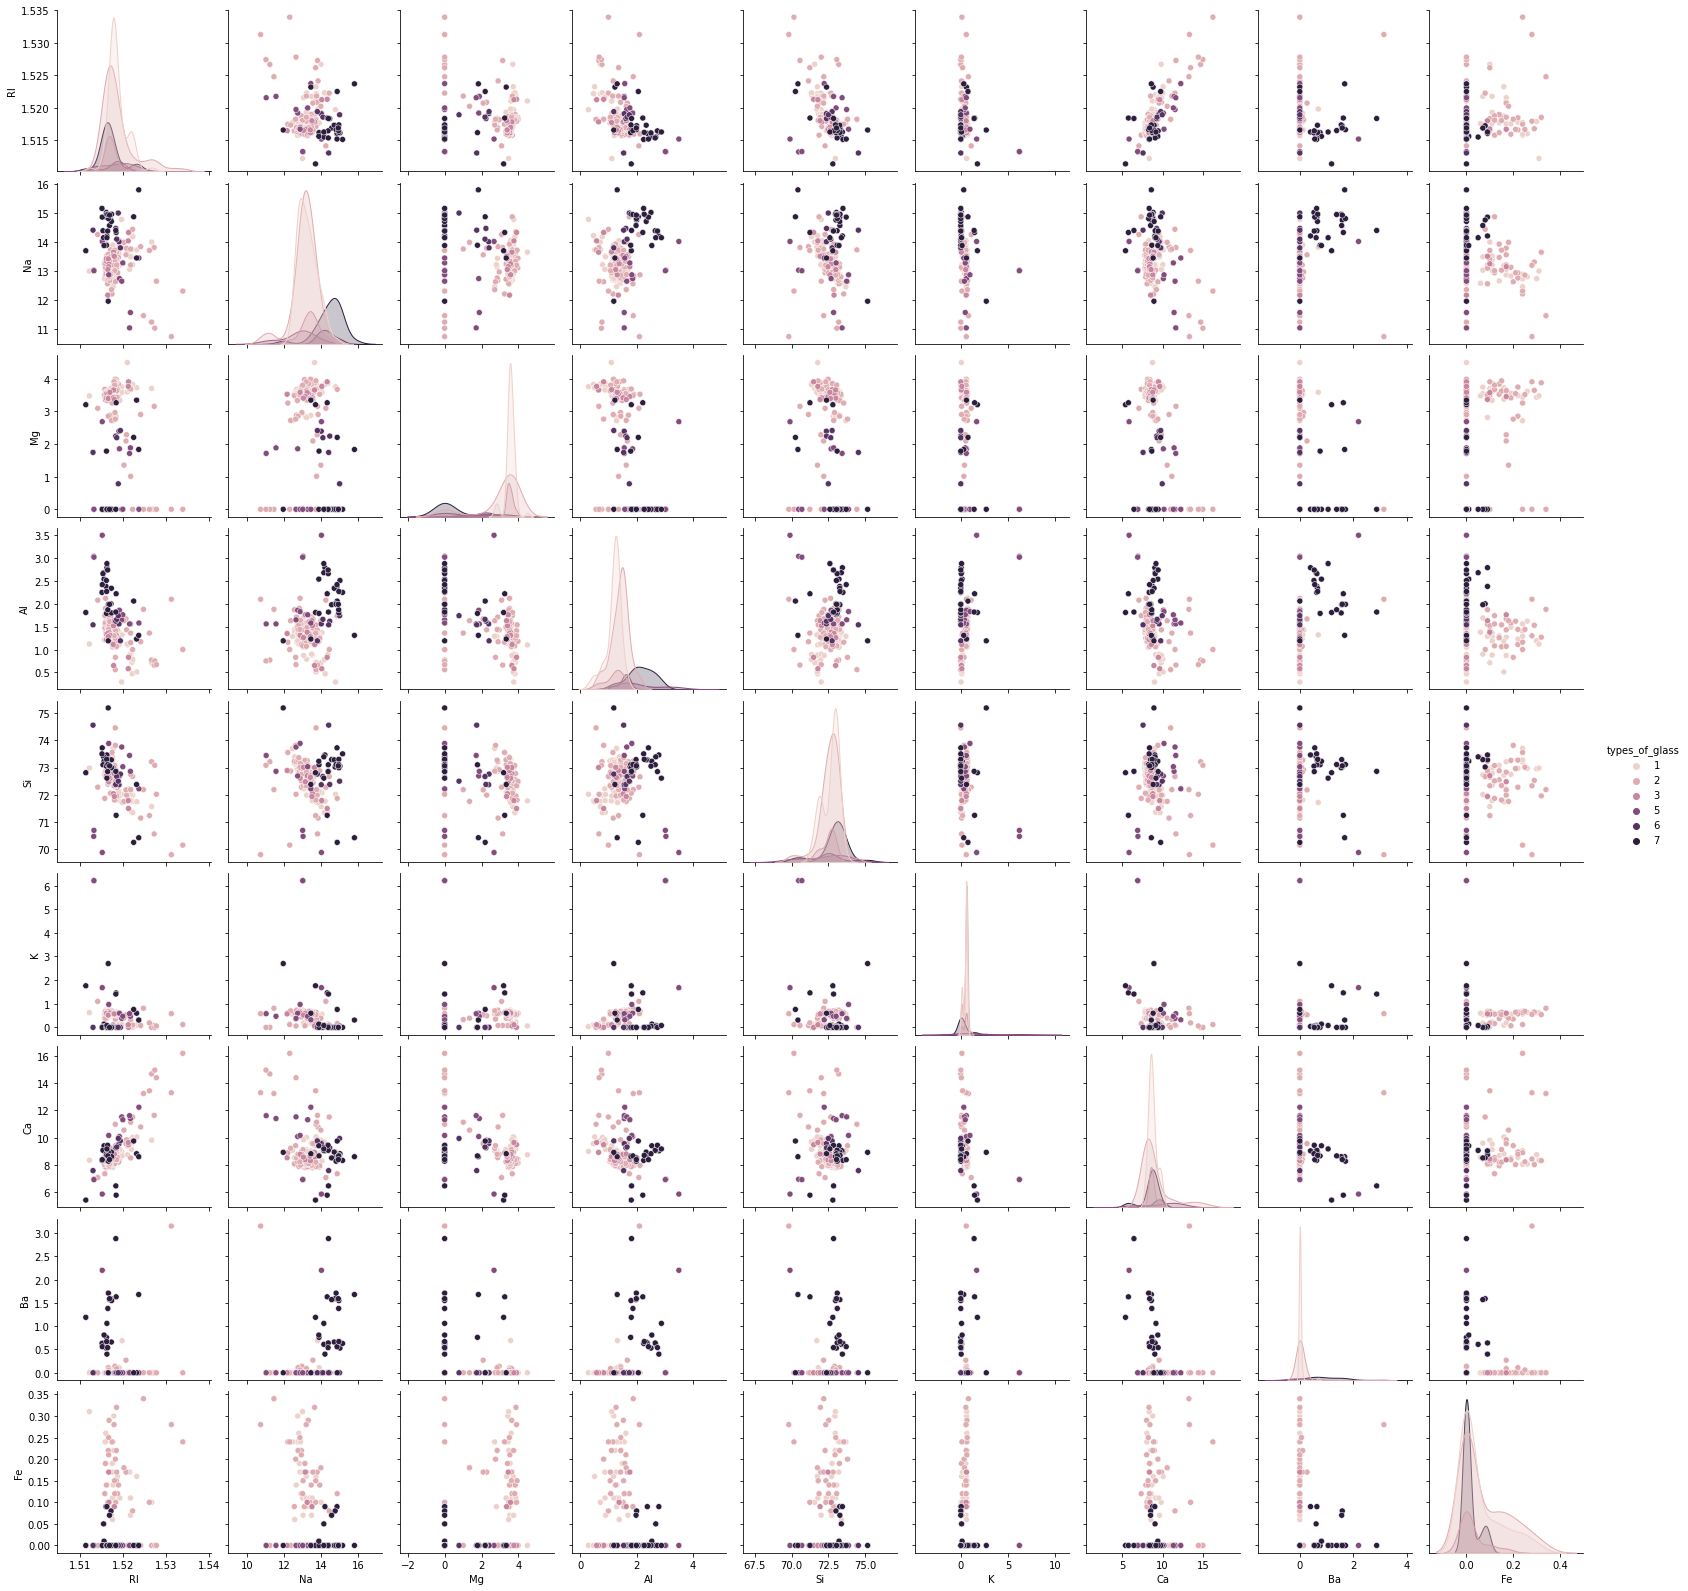

In [33]:
sns.pairplot(df2,hue='types_of_glass')
plt.show()

Pair plot doesnt show linear relationship. so we use classification algorthim to predict the values

In [51]:
X = df.drop(columns = ["Id","types_of_glass","Ca","K"]).values
y = df[["types_of_glass"]].values

**Splitting data**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

**Feature Scaling**

In [53]:
scaling = StandardScaler()
scaling.fit_transform(X_train,y_train)
X_train_scaled = scaling.transform(X_train) 
X_test_scaled = scaling.transform(X_test)

**Fitting K-NN to the Training set**

In [65]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.675

**Predicting the Test set results**

In [66]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 1, 2, 1, 2, 2, 6, 2, 1, 1, 1, 6, 2, 2, 7, 1, 3, 1, 3, 1, 2,
       2, 2, 1, 2, 2, 6, 6, 1, 1, 2, 1, 1, 1, 2, 7, 5, 5, 1])

In [70]:
knn = KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.625

In [71]:
y_epred = knn.predict(X_test)
y_epred

array([2, 1, 1, 2, 1, 2, 2, 6, 1, 1, 1, 1, 6, 2, 2, 7, 1, 3, 1, 3, 1, 2,
       2, 2, 1, 2, 2, 6, 6, 1, 1, 2, 1, 1, 1, 2, 7, 5, 5, 2])

**Making the Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


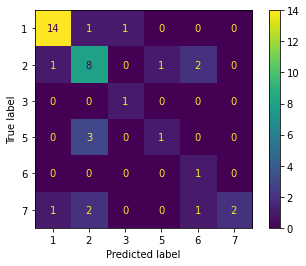

In [67]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [79]:
y_pred1 = knn.predict(X)

In [82]:
df2 = pd.DataFrame({"Actual": df["types_of_glass"], "Predicted":y_pred1})
df2

,Actual,Predicted
0,1,1
1,1,2
2,1,2
3,1,2
4,1,1
...,...,...
191,7,7
192,7,7
193,7,7
194,7,7


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.57      0.67      0.62        12
           3       0.50      1.00      0.67         1
           5       0.50      0.25      0.33         4
           6       0.25      1.00      0.40         1
           7       1.00      0.33      0.50         6

    accuracy                           0.68        40
   macro avg       0.62      0.69      0.57        40
weighted avg       0.74      0.68      0.67        40



In [76]:
print(classification_report(y_test,y_epred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        16
           2       0.50      0.58      0.54        12
           3       0.50      1.00      0.67         1
           5       0.50      0.25      0.33         4
           6       0.25      1.00      0.40         1
           7       1.00      0.33      0.50         6

    accuracy                           0.62        40
   macro avg       0.59      0.66      0.54        40
weighted avg       0.69      0.62      0.62        40



Manhatton provides best report as compared to the euclidean